# Radiative Forcing of different model simulations

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071930

paths of namelist files:

CTRL: `/projects/0/prace_imau/prace_2013081679/cesm1_0_4/spinup_pd_maxcores_f05_t12/run/atm_in`

LPD: `/projects/0/acc/cesm/cesm1_1_2/spinup_B_2000_cam5_f09_g16/run/atm_in`

"present day"/"year 2000" CO<sub>2</sub> value: 367 ppm

In [1]:
import sys
import scipy as sp
import numpy as np
import xarray as xr
import cmocean
import matplotlib.pyplot as plt
import matplotlib

In [2]:
sys.path.append("..")
%matplotlib inline
matplotlib.rc_file('../rc_file')
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [3]:
from paths import path_results

In [4]:
def radiative_forcing(C, N, M):
    """
    C .. CO2 conc. [ppm]
    M .. CH4 conc. [ppb]
    N .. N2O conc. [ppb]
    """
    a1 = -2.4e-7
    b1 =  7.2e-4
    c1 = -2.1e-4
    a2 = -8.0e-6
    b2 =  4.2e-6
    c2 = -4.9e-6
    a3 = -1.3e-6
    b3 = -8.2e-6
    
    C0 = 278.  # [ppm]
    M0 = 722.  # [ppb]
    N0 = 270.  # [ppb]
    
    Cbar = (C+C0)/2  # [ppm]
    Mbar = (M+M0)/2  # [ppb]
    Nbar = (N+N0)/2  # [ppb]
    
    CO2_forcing = (a1*(C-C0)**2 + b1*abs(C-C0) + c1*Nbar + 5.36) * np.log(C/C0)
    N2O_forcing = (a2*Cbar + b2*Nbar + c2*Mbar + 0.177) * (np.sqrt(N) - np.sqrt(N0))
    CH4_forcing = (a3*Mbar + b3*Nbar + 0.043) * (np.sqrt(M) - np.sqrt(M0))

    return (CO2_forcing, N2O_forcing, CH4_forcing)


def forcings(ds):
    ds['CO2_forc'] = ds['CO2'].copy()
    ds['CH4_forc'] = ds['CO2'].copy()
    ds['N2O_forc'] = ds['CO2'].copy()
    for t in range(len(ds.time)):
        (CO2, N2O, CH4) = radiative_forcing(C=ds.CO2[t], N=ds.N2O[t], M=ds.CH4[t])
        ds['CO2_forc'][t] = CO2
        ds['CH4_forc'][t] = CH4
        ds['N2O_forc'][t] = N2O
    return ds

In [5]:
def onepercent(CO20):
    A = np.array([CO20]*140)
    for t in np.arange(1,140):
        A[t] = A[t-1]*1.01
    return A

A = onepercent(278.)
B = onepercent(369.)

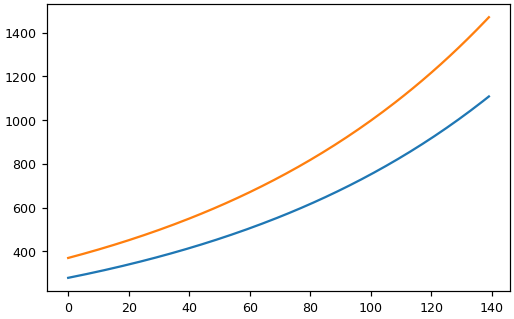

In [6]:
plt.plot(A)
plt.plot(B)


## RCP8.5 GHG forcings

In [7]:
rcp85 = '/projects/0/prace_imau/prace_2013081679/cesm1_0_4/inputdata/atm/cam/ggas/make_new_ghg/ghg_rcp85_1765-2500_c100203.nc'

In [8]:
'/projects/0/prace_imau/prace_2013081679/cesm1_0_4/inputdata/atm/cam/ggas/co2_rcp85_1765-2500_but_ch4_n2o_f11_f12_y2000_values.nc'

'/projects/0/prace_imau/prace_2013081679/cesm1_0_4/inputdata/atm/cam/ggas/co2_rcp85_1765-2500_but_ch4_n2o_f11_f12_y2000_values.nc'

In [9]:
ds = xr.open_dataset(rcp85, decode_times=False)

In [10]:
ds = forcings(ds)

In [11]:
ds

<xarray.Dataset>
Dimensions:   (time: 736)
Coordinates:
  * time      (time) float64 181.0 546.0 911.0 ... 2.677e+05 2.681e+05 2.685e+05
Data variables:
    date      (time) int32 ...
    CO2       (time) float32 ...
    CH4       (time) float32 ...
    N2O       (time) float32 ...
    f11       (time) float32 ...
    f12       (time) float32 ...
    adj       (time) float32 ...
    CO2_forc  (time) float32 ...
    CH4_forc  (time) float32 ...
    N2O_forc  (time) float32 ...
Attributes:
    comment:  3 February 2010: Prepared by B. Eaton using data provided by Je...

(2077, 2078)

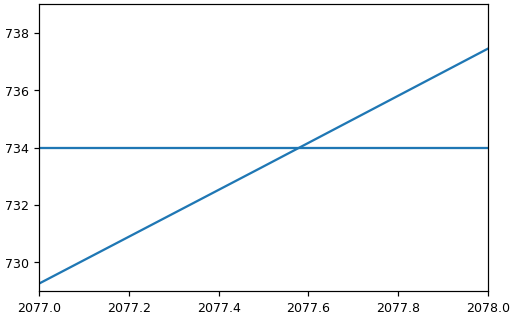

In [12]:
plt.plot(ds.time/365+1765, ds.CO2)
plt.axhline(367)
plt.axhline(2*367)
plt.ylim((2*367-5, 2*367+5))
plt.xlim((2077,2078))


/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


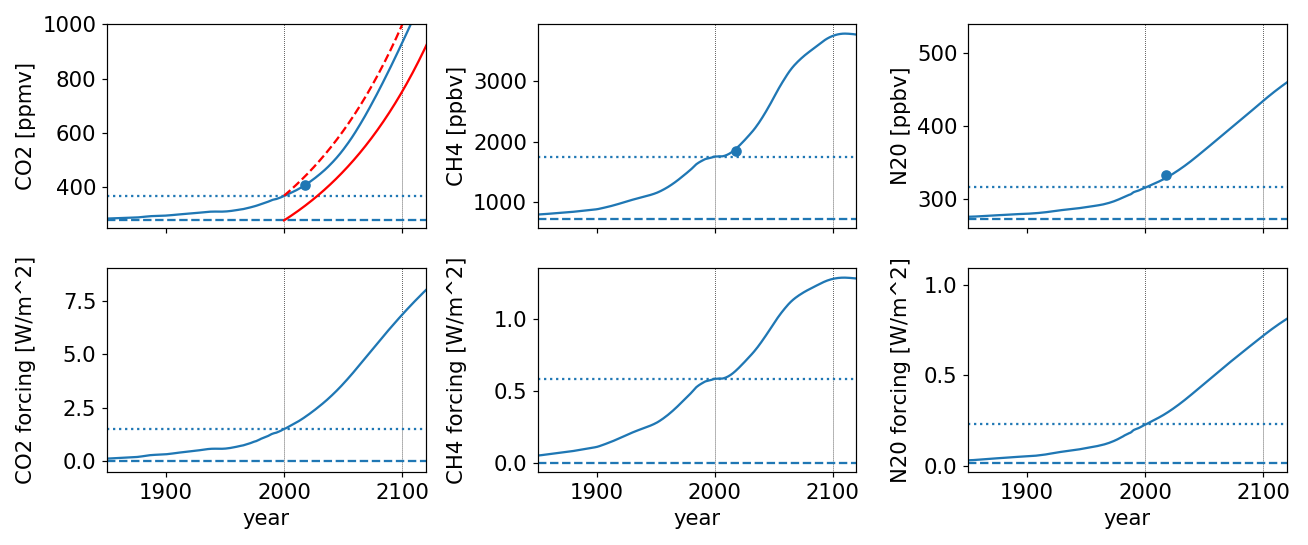

In [13]:
f, ax = plt.subplots(2, 3, figsize=(12,5), sharex='col')

# plt.plot(ds.time/365+1765, ds.CH4)
for i in range(2):
    for j in range(3):
        ax[1,j].set_xlabel('year', fontsize=14)
        ax[1,j].set_xlim((1850,2120))
        ax[i,j].tick_params(labelsize=14)
        ax[i,j].axvline(2000, c='k', lw=.5, ls=':')
        ax[i,j].axvline(2100, c='k', lw=.5, ls=':')


ax[0,0].set_ylabel('CO2 [ppmv]', fontsize=14)
ax[0,0].plot(ds.time/365+1765, ds.CO2)
ax[0,0].axhline(ds.CO2.sel({'time':(2000-1765)*365}, method='nearest'), ls=':')
ax[0,0].axhline(ds.CO2.sel({'time':(1765-1765)*365}, method='nearest'), ls='--')
ax[0,0].plot(np.arange(2000,2000+140), A, c='r')
ax[0,0].plot(np.arange(2000,2000+140), B, c='r', ls='--')

ax[0,0].scatter(2018,410)
ax[0,1].set_ylabel('CH4 [ppbv]', fontsize=14)
ax[0,1].plot(ds.time/365+1765, ds.CH4)
ax[0,1].axhline(ds.CH4.sel({'time':(2000-1765)*365}, method='nearest'), ls=':')
ax[0,1].axhline(ds.CH4.sel({'time':(1765-1765)*365}, method='nearest'), ls='--')
ax[0,1].scatter(2018,1850)
ax[0,2].set_ylabel('N20 [ppbv]', fontsize=14)
ax[0,2].plot(ds.time/365+1765, ds.N2O)
ax[0,2].axhline(ds.N2O.sel({'time':(2000-1765)*365}, method='nearest'), ls=':')
ax[0,2].axhline(ds.N2O.sel({'time':(1765-1765)*365}, method='nearest'), ls='--')
ax[0,2].scatter(2018,333)


ax[1,0].set_ylabel('CO2 forcing [W/m^2]', fontsize=14)
ax[1,0].plot(ds.time/365+1765, ds.CO2_forc)
ax[1,0].axhline(ds.CO2_forc.sel({'time':(2000-1765)*365}, method='nearest'), ls=':')
ax[1,0].axhline(ds.CO2_forc.sel({'time':(1765-1765)*365}, method='nearest'), ls='--')
ax[1,1].set_ylabel('CH4 forcing [W/m^2]', fontsize=14)
ax[1,1].plot(ds.time/365+1765, ds.CH4_forc)
ax[1,1].axhline(ds.CH4_forc.sel({'time':(2000-1765)*365}, method='nearest'), ls=':')
ax[1,1].axhline(ds.CH4_forc.sel({'time':(1765-1765)*365}, method='nearest'), ls='--')
ax[1,2].set_ylabel('N20 forcing [W/m^2]', fontsize=14)
ax[1,2].plot(ds.time/365+1765, ds.N2O_forc)
ax[1,2].axhline(ds.N2O_forc.sel({'time':(2000-1765)*365}, method='nearest'), ls=':')
ax[1,2].axhline(ds.N2O_forc.sel({'time':(1765-1765)*365}, method='nearest'), ls='--')

ax[0,0].set_ylim((250,1000))
ax[1,0].set_ylim((-.5,9))
f.align_ylabels()
f.tight_layout()
f.savefig(f'{path_results}/FORCING/RCP85_forcing')

/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


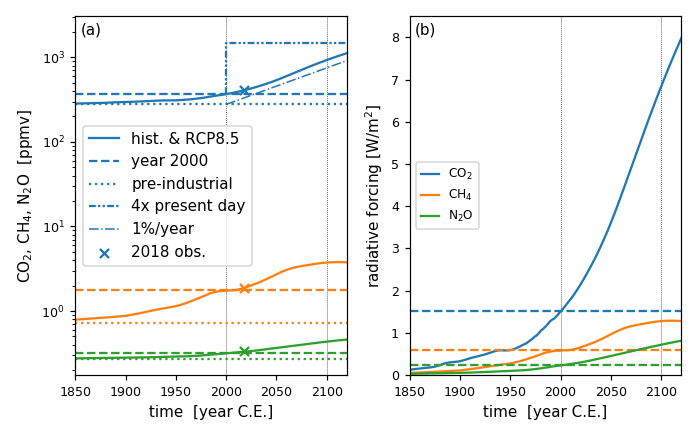

In [22]:
f, ax = plt.subplots(1, 2, figsize=(6.4,4), sharex='col')
s2, s4, u2 = r'$_2$', r'$_4$', r'$^2$'
# plt.plot(ds.time/365+1765, ds.CH4)
for i in range(2):
    ax[i].set_xlabel('time  [year C.E.]')
    ax[i].set_xlim((1850,2120))
#     ax[i].tick_params(labelsize=14)
    ax[i].axvline(2000, c='k', lw=.5, ls=':')
    ax[i].axvline(2100, c='k', lw=.5, ls=':')

co2_pd = ds.CO2.sel({'time':(2000-1765)*365}, method='nearest')

ax[0].set_ylabel(f'CO{s2}, CH{s4}, N{s2}O  [ppmv]')

ax[0].scatter(2018,410, marker='x'                                  , c='C0', label='2018 obs.')
ax[0].plot(ds.time/365+1765, ds.CO2                                 , ls='-' , c='C0', label='hist. & RCP8.5')
ax[0].axhline(co2_pd                                                , ls='--', c='C0', label='year 2000')
ax[0].axhline(ds.CO2.sel({'time':(1765-1765)*365}, method='nearest'), ls=':' , c='C0', label='pre-industrial')
ax[0].plot([2000,2000,2200],[co2_pd,co2_pd*4,co2_pd*4]              , ls=(0, (3, 1, 1, 1, 1, 1)), c='C0', label='4x present day')
ax[0].plot(np.arange(2000,2000+140), A, lw=1                        , ls='-.', c='C0', label='1%/year')
# ax[0].plot(np.arange(2000,2000+140), B, l.5                       , ls='-.', c='C0')

ax[0].plot(ds.time/365+1765, ds.CH4/1e3                                 , ls='-' , c='C1')
ax[0].axhline(ds.CH4.sel({'time':(2000-1765)*365}, method='nearest')/1e3, ls='--', c='C1')
ax[0].axhline(ds.CH4.sel({'time':(1765-1765)*365}, method='nearest')/1e3, ls=':' , c='C1')
ax[0].scatter(2018,1850/1e3, c='C1', marker='x')
ax[0].plot(ds.time/365+1765, ds.N2O/1e3                                 , ls='-' , c='C2')
ax[0].axhline(ds.N2O.sel({'time':(2000-1765)*365}, method='nearest')/1e3, ls='--', c='C2')
ax[0].axhline(ds.N2O.sel({'time':(1765-1765)*365}, method='nearest')/1e3, ls=':' , c='C2')
ax[0].scatter(2018,333/1e3, c='C2', marker='x')


ax[1].set_ylabel(f'radiative forcing [W/m{u2}]')
ax[1].plot(ds.time/365+1765, ds.CO2_forc                                 , ls='-' , c='C0', label=r'CO$_2$')
ax[1].axhline(ds.CO2_forc.sel({'time':(2000-1765)*365}, method='nearest'), ls='--', c='C0')
# ax[1].axhline(ds.CO2_forc.sel({'time':(1765-1765)*365}, method='nearest'), ls=':' , c='C0')
ax[1].plot(ds.time/365+1765, ds.CH4_forc                                 , ls='-' , c='C1', label=r'CH$_4$')
ax[1].axhline(ds.CH4_forc.sel({'time':(2000-1765)*365}, method='nearest'), ls='--' , c='C1')
# ax[1].axhline(ds.CH4_forc.sel({'time':(1765-1765)*365}, method='nearest'), ls=':' , c='C2')
ax[1].plot(ds.time/365+1765, ds.N2O_forc                                 , ls='-' , c='C2', label=r'N$_2$O')
ax[1].axhline(ds.N2O_forc.sel({'time':(2000-1765)*365}, method='nearest'), ls='--', c='C2')
# ax[1].axhline(ds.N2O_forc.sel({'time':(1765-1765)*365}, method='nearest'), ls='--', c='C2')

ax[0].semilogy()
ax[0].legend()
ax[1].legend(loc='center left', fontsize=8, handlelength=1.5)
# ax[1].semilogy()

for i in range(2):   ax[i].text(0.02,.95, ['(a)','(b)'][i], transform=ax[i].transAxes)
ax[1].set_ylim((0,8.5))
f.align_ylabels()
f.tight_layout()
f.savefig(f'{path_results}/FORCING/forcing_scenarios')
f.savefig(f'{path_results}/thesis/2_forcings.eps')


In [15]:
print(ds.CO2_forc.sel({'time':(2100-1765)*365}, method='nearest').values)
print(ds.CH4_forc.sel({'time':(2100-1765)*365}, method='nearest').values)
print(ds.N2O_forc.sel({'time':(2100-1765)*365}, method='nearest').values)

print(ds.CO2_forc.sel({'time':(2100-1765)*365}, method='nearest').values/8.5)


6.865304
1.2787298
0.7202122
0.8076828227323645
